#### This dataset contains crime data for the city of  Vancouver on a year-by-year basis from 2003 to 2018.
#### Data was colected by Vancouver police department and can be found [here ](https://data.vancouver.ca/datacatalogue/crime-data.htm) 
#### The dataset contains ten columns and 584737 rows

### Crime attributes
* TYPE: The type of crime activities
    * BNE Commercial: (Commercial Break and Enter) Breaking and entering into a commercial property with intent to commit an offence
    * BNE Residential/Other: (Residential Break and Enter) Breaking and entering into a dwelling/house/apartment/garage with intent to commit an offence
    * Vehicle Collision or Pedestrian Struck (with Fatality): Includes primarily pedestrian or cyclist struck and killed by a vehicle. It also includes vehicle to vehicle fatal accidents, however these incidents are fewer in number when compared to the overall data set.
    * Vehicle Collision or Pedestrian Struck (with Injury): Includes all categories of vehicle involved accidents with injuries. This includes pedestrian and cyclist involved incidents with injuries.
    * Homicide: A person, directly or indirectly, by any means, causes the death of another person.
    * Mischief: A person commits mischief that willfully causes malicious destruction, damage, or defacement of property. This also includes any public mischief towards another person.
    * Offence Against a Person: An attack on a person causing harm that may include usage of a weapon.
    * Other Theft: Theft of property that includes personal items (purse, wallet, cellphone, laptop, etc.), bicycle, etc.
    * Theft from Vehicle: Theft of property from a vehicle
    * Theft of Vehicle: Theft of a vehicle, motorcycle, or any motor vehicle
    * Theft of Bicycle: Theft of a bicycle

* YEAR: A four-digit field that indicates the year when the reported crime activity occurred
* MONTH: A numeric field that indicates the month when the reported crime activity occurred
* DAY: A two-digit field that indicates the day of the month when the reported crime activity occurred
* HOUR: A two-digit field that indicates the hour time (in 24 hours format) when the reported crime activity occurred
* MINUTE: A two-digit field that indicates the minute when the reported crime activity occurred
* HUNDRED_BLOCK: Generalized location of the report crime activity
* NEIGHBOURHOOD: The Vancouver Police Department uses the Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA).
The Musqueam Indian Band is located in the southwest corner of the City of Vancouver. There is a service agreement between Musqueam and the City of Vancouver, where the City provides municipal services such as policing. As a result, Musqueam crime data is included with the VPD Open Data.
* X: Coordinate values are projected in UTM Zone 10. All data must be considered offset and users should not interpret any locations as related to a specific person or specific property.
* Y: Coordinate values are projected in UTM Zone 10. All data must be considered offset and users should not interpret any locations as related to a specific person or specific property.

### In this analysis, I will be generating general stats and try to answer these questions  :
* Number of Crimes reported each year
* Which crime types are the most common?
* Which day of the week and month of the year result in the most crimes?
* When Does Crime Most Often Happen?
* What times of day are police most active?
* Which neighborhoods had the most crimes and did that change over the years?
* Where are the most dangerous intersections in Vancouver for 2018?
* What are the most common crimes in Christmas day and where do they happen?



In [135]:
# Importing necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import os
print(os.listdir("../input"))
import folium
from folium import plugins
from pyproj import Proj, transform
import seaborn as sns


['crime_csv_all_years.csv']


In [136]:
# Read the dataset
crime_df = pd.read_csv('../input/crime_csv_all_years.csv')

In [137]:
# Data explorision
print(crime_df.info())
crime_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584737 entries, 0 to 584736
Data columns (total 10 columns):
TYPE             584737 non-null object
YEAR             584737 non-null int64
MONTH            584737 non-null int64
DAY              584737 non-null int64
HOUR             525848 non-null float64
MINUTE           525848 non-null float64
HUNDRED_BLOCK    584724 non-null object
NEIGHBOURHOOD    523450 non-null object
X                584737 non-null float64
Y                584737 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 44.6+ MB
None


TYPE  YEAR     ...              X           Y
0                           Mischief  2003     ...      494398.88  5458620.71
1  Break and Enter Residential/Other  2003     ...      494565.07  5455426.06
2                        Other Theft  2003     ...      491398.87  5458862.01
3                 Theft from Vehicle  2003     ...      492718.25  5457784.58
4                           Mischief  2003     ...      495228.18  5453626.13

[5 rows x 10 columns]

#### There are some missing data in the 'HOUR' and 'Neighbourhood' columns, per the data dictionary, no time information is provided for offenses against a person crime type, but that shouldn't be a problem for this analysis.
**I will create a date column that combines year, month and day in one column and check to see if we have enough data for 2018 to analyze **



In [138]:
# Create new date column
crime_df['Date'] = pd.to_datetime(crime_df[['YEAR', 'MONTH', 'DAY']])
crime_df['Date'].head()

0   2003-10-11
1   2003-09-14
2   2003-06-26
3   2003-05-18
4   2003-11-15
Name: Date, dtype: datetime64[ns]

In [139]:
# Checking what is the last date we have for 2018
crime_df['Date'].max()

Timestamp('2018-12-07 00:00:00')

**We have crime data until 2018/12/07, so it is not complete but should be good enough for this analysis.**

### Total Number of Crimes reported each year
Let's check the Total number of crimes from 2013 to 2018.

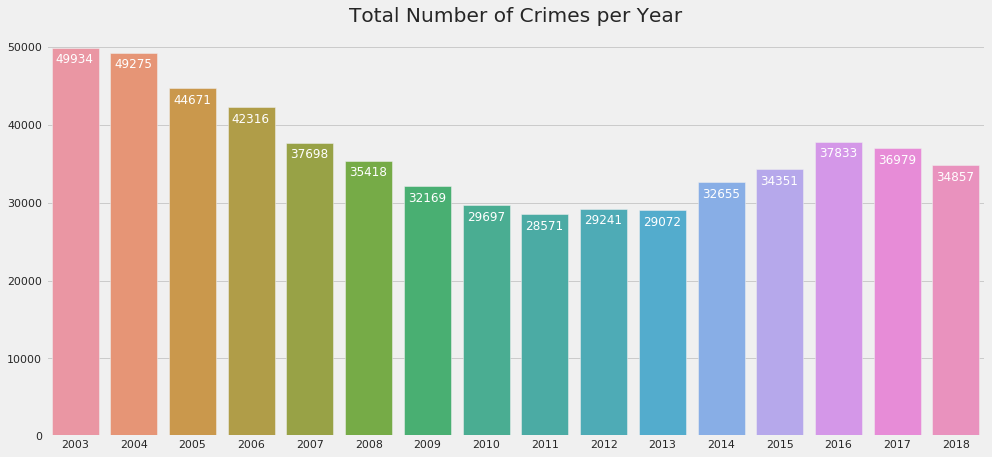

In [140]:
# Creating the figure and plotting the data
plt.figure(figsize=(15,7))
graph = sns.countplot(x='YEAR', data=crime_df)
plt.title('Total Number of Crimes per Year')
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.07, i.get_height()-2000, str(i.get_height()), fontsize=12, color='white')    

plt.show()

** It seems that most crimes happened in 2003, the total number decreased every year until 2011 which has the lowest total number of crimes. The total number of crimes increased after that and peaked at 2016, and seems to be dropping again. I have to mention that data for 2018 is not complete, so the total for 2018 could increase.**

## Most common crimes from 2003 to 2018


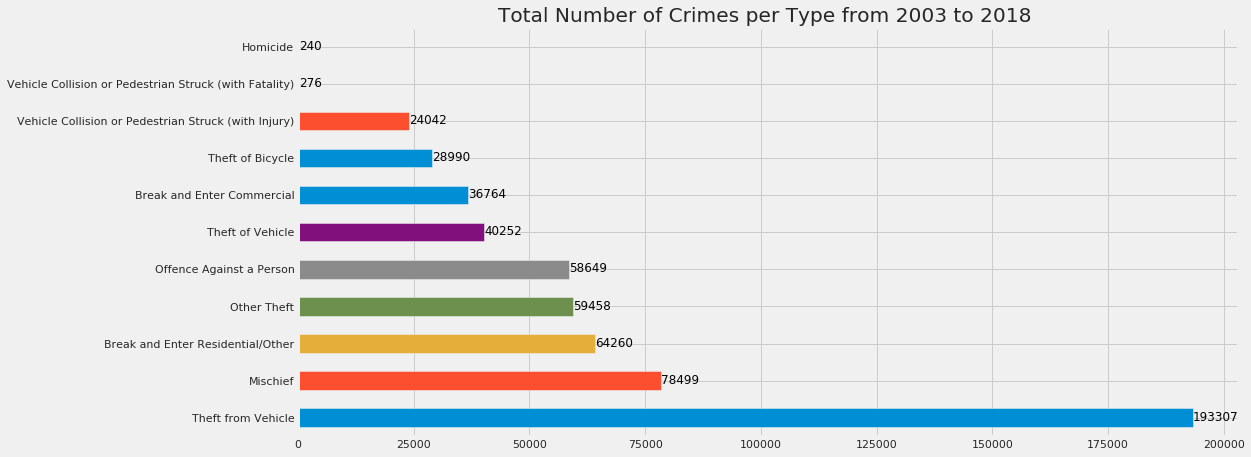

In [141]:
# Creating a graph to plot the data
graph = crime_df['TYPE'].value_counts().plot.barh(figsize=(15,7), title = 'Total Number of Crimes per Type from 2003 to 2018 ' )
# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_width()+.3, i.get_y()+.17, str(i.get_width()), fontsize=12, color='black')    

plt.show()

** We can see that the most common crime type by far is "Theft from Vehicle", and the least common types are "Homicide" , "Vehicle Collision and Pedestrian Struck (with Fatality)"**

### 5 Neighborhoods with most crimes

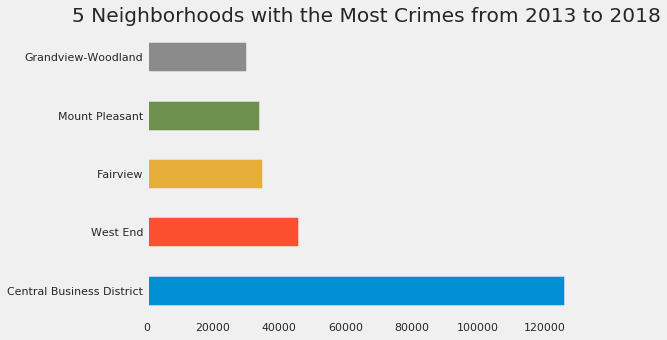

In [142]:
# Creating a temp df for locations
crime_loc = crime_df.groupby('NEIGHBOURHOOD')['TYPE'].count().sort_values(ascending = False)
crime_top_5 = crime_loc[:5]
graph = crime_top_5.plot.barh(figsize=(7,5), title = '5 Neighborhoods with the Most Crimes from 2013 to 2018')
graph.xaxis.label.set_visible(False)
graph.yaxis.label.set_visible(False)
plt.grid(False)
plt.show()

**We can see that Central Business Distict is in the top of the list **

### Monthly trend for each crime type
Next, I will try to find out if there is a monthly trend for the different type of crimes.

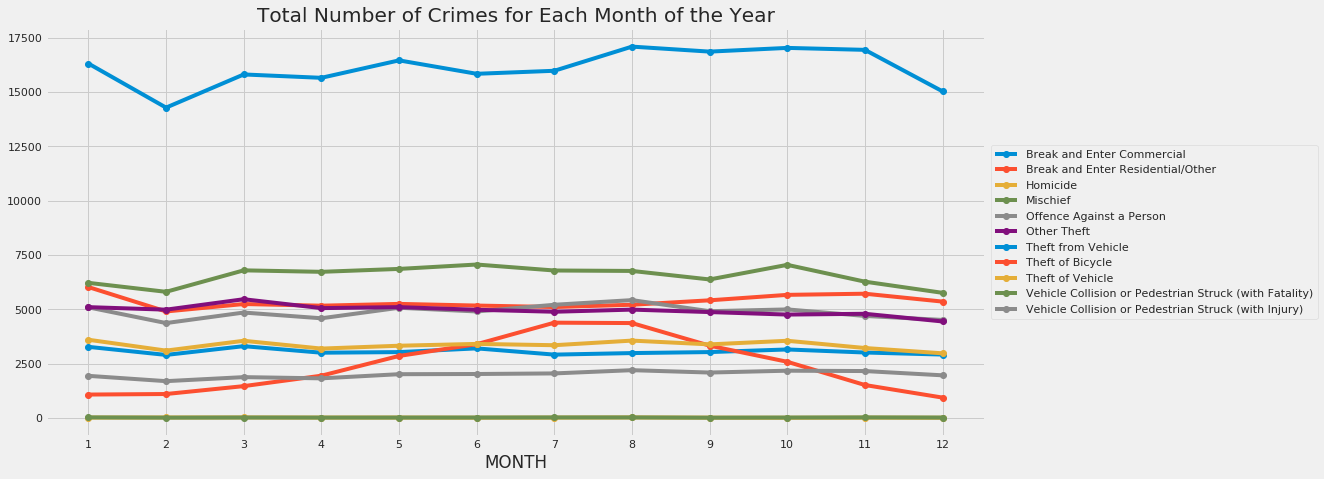

In [143]:
# Group the dataframe by month and type of crime
crimes_trend = crime_df.groupby(["MONTH","TYPE"])['TYPE'].count().unstack()
graph = crimes_trend.plot(figsize=(15,7), title = 'Total Number of Crimes for Each Month of the Year', rot = 0, marker='o')
plt.xticks(np.arange(1,13))

# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**I don't see any trend except for the theft of bicycle, it seems they happen more in the summer which makes sense as a lot of people would use their bikes more in the summer, and for theft from vehicle which seems to decrease in February and December, but I can't tell why.**

### Let's check top Top 5 Neighbourhoods Where most crimes happened for each year to find out if there is a change
**I will start with crimes  from 2003 to 2011**

<Figure size 432x288 with 0 Axes>

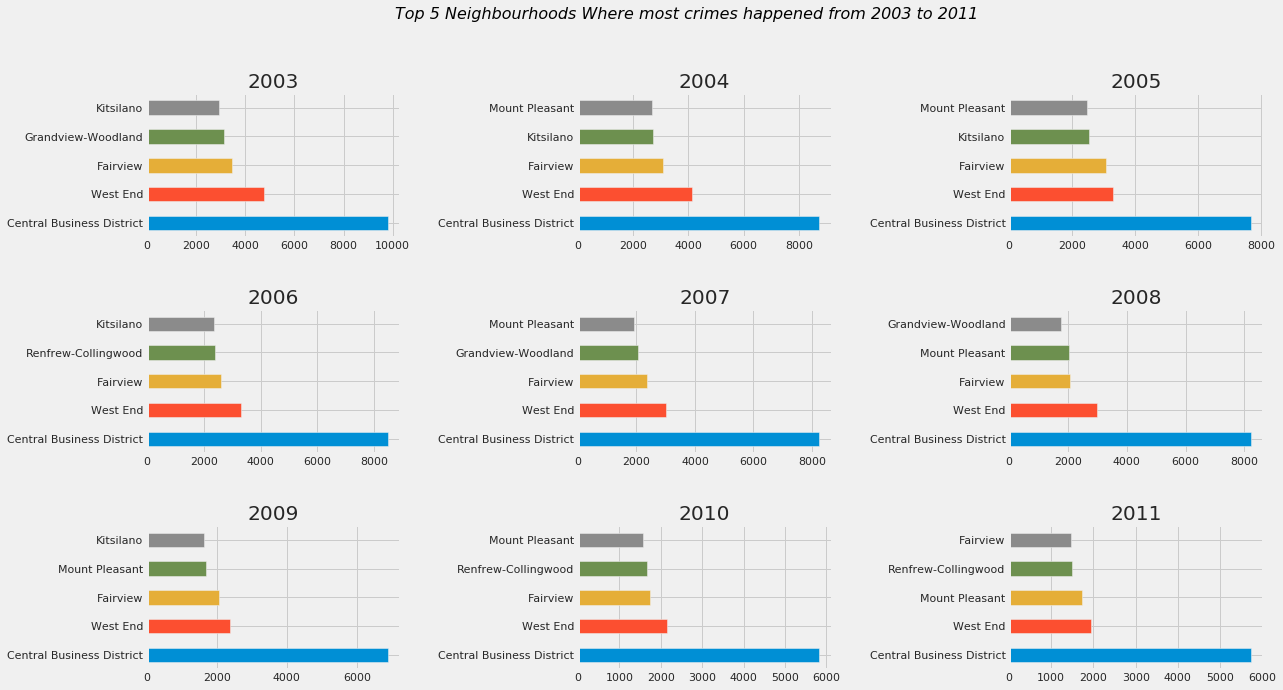

In [144]:
# Create a function to plot the data that takes the year and number of subplot
def plot_data(year,subplot_no):
    plt.subplot(3,3,subplot_no)
    top_neigh = crime_df[crime_df['YEAR'] == year]['NEIGHBOURHOOD'].value_counts().sort_values(ascending=False)[:5]
    top_neigh.plot.barh(title = f'{year}')
    
# Create a list of years 
years = crime_df["YEAR"].unique()
    
# plot with various axes scales
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplots_adjust(left  = 0.125, right = 0.9,bottom = 0.1, top = 0.9, wspace = 0.7, hspace = 0.5 )

# Loop through years from 2003 till 2011 and plot the data
subplot_no = 1
for year in years[:9]:
    plot_data(year,subplot_no)
    subplot_no += 1
    
# general title
plt.suptitle("Top 5 Neighbourhoods Where most crimes happened from 2003 to 2011", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)
plt.show()


**Now, data from 2012 to 2018**

<Figure size 432x288 with 0 Axes>

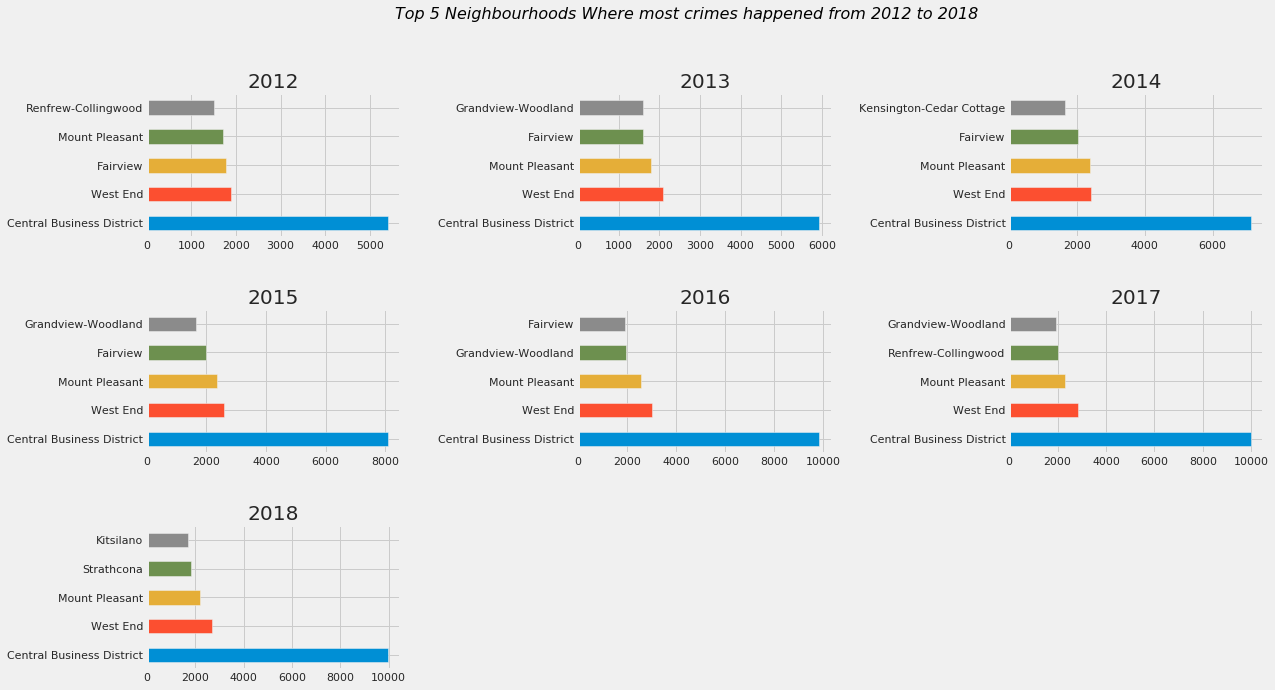

In [145]:
# plot with various axes scales
plt.figure(1)
plt.figure(figsize=(20,10))
plt.subplots_adjust(left  = 0.125, right = 0.9,bottom = 0.1, top = 0.9, wspace = 0.7, hspace = 0.5 )

# Loop through years from 2012 till 2018 and plot the data
subplot_no = 1
for year in years[9:16]:
    plot_data(year,subplot_no)
    subplot_no += 1
    
# general title
plt.suptitle("Top 5 Neighbourhoods Where most crimes happened from 2012 to 2018", fontsize=16, fontweight=0, color='black', style='italic', y=1.02)
plt.show()

**Central Business District is where most crimes happened since 2003 with a total number far bigger than other areas.**
**West End is second, and that didn't change since 2003.**
**Fairview was third from 2003 to 2010, then in 2011 it was fifth, and Mount Pleasant took its place. In 2017 and 2018, Fairview is not in the top 5 anymore. This is interesting as someone could investigate further and find out why Fairview is a safer neighborhood now.**

### Which day of the week and which month of the year results in most crimes? 


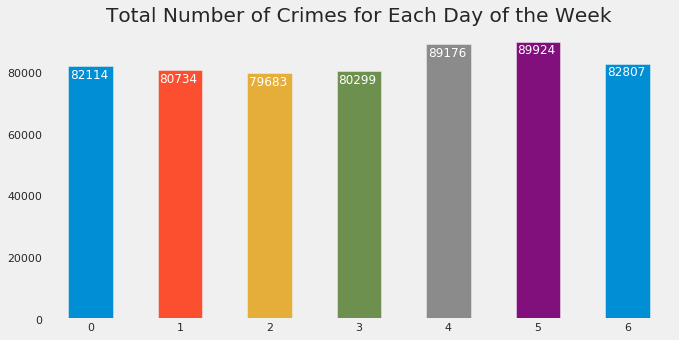

In [146]:
# Plotting a bar chart for which day of the week result in most crimes
graph = crime_df['Date'].dt.weekday.value_counts().sort_index().plot.bar(figsize=(10,5), title = 'Total Number of Crimes for Each Day of the Week', rot = 0 )
plt.grid(False)

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.02, i.get_height()-4000, str(i.get_height()), fontsize=12, color='white')    

plt.show()

**In this plot, Monday is 0, and Sunday is 6. It looks like most crimes happened on Saturdays, but there isn't a big difference. **
**Let's check in which month of the year most crimes happened **

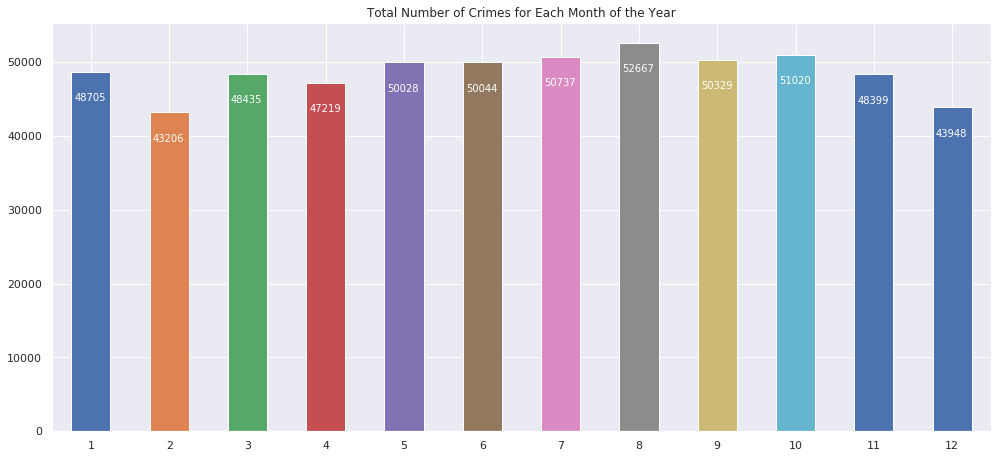

In [147]:
# Changing the style
sns.set()

# Creating the graph
graph = crime_df['MONTH'].value_counts().sort_index().plot.bar(figsize=(15,7), title = 'Total Number of Crimes for Each Month of the Year', rot = 0 )

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_x()+.04, i.get_height()-4000, str(i.get_height()), fontsize=10, color='white')    

plt.show()

**It looks like most crimes happened in August and the least happened in February, but there isn't a big difference also. **
**Let's check and find out When did most of these crimes happened?**

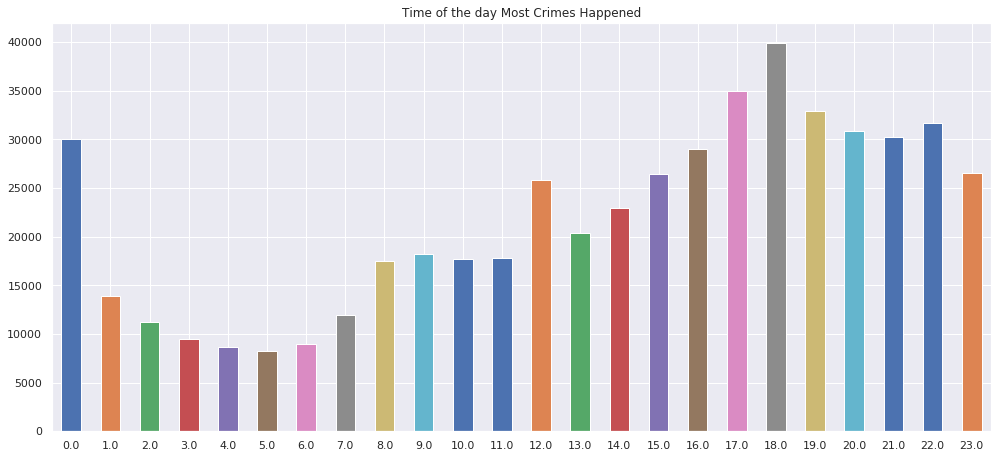

In [148]:
# Plotting time of the day in which most crimes happened
graph = crime_df['HOUR'].value_counts().sort_index().plot.bar(figsize=(15,7), title = 'Time of the day Most Crimes Happened', rot = 0 )
plt.show()

**Interesting, it seems that most crimes happened at 6 PM and the least total number of crimes happened at 5 AM. I thought crimes would mostly occur after midnight.**

In [149]:
# Comparing crimes per month for all years
#c = crime_df.groupby(['MONTH', 'YEAR'])['TYPE'].count()
#graph = c.unstack().plot.bar(figsize=(40,10))

**Let's now map out crimes. I will have to convert the coordinates in the dataframe from UTM EPSG:26910 NAD83  to longitude, latitude EPSG:4326 WGS 84 for plotting.**
**Because mapping is very intensive in terms of CPU resources and memory, I we'll need to filter down the data.**

In [150]:
# Converting cordinates 
inProj = Proj(init='epsg:26910')
outProj = Proj(init='epsg:4326')
x1,y1 = crime_df['X'].tolist(),crime_df['Y'].tolist()
crime_df['latitude'], crime_df['longitude'] = transform(inProj,outProj,x1,y1)
crime_df.head()

TYPE  YEAR    ...        latitude  longitude
0                           Mischief  2003    ...     -123.077011  49.280315
1  Break and Enter Residential/Other  2003    ...     -123.074683  49.251580
2                        Other Theft  2003    ...     -123.118264  49.282451
3                 Theft from Vehicle  2003    ...     -123.100103  49.272776
4                           Mischief  2003    ...     -123.065549  49.235395

[5 rows x 13 columns]

** Create a map for the first 1000 rows in our dataframe**

In [151]:
# Create a map for the center of Vancouver
crime_map = folium.Map(location=[49.246292, -123.1162261], zoom_start=12)
marker_cluster = folium.plugins.MarkerCluster().add_to(crime_map)
for name, row in crime_df.iloc[:1000].iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["TYPE"]).add_to(marker_cluster)
#crime_map.create_map('stops.html')
crime_map

 **Extend our analysis further with a heatmap**

In [152]:
crime_heatmap = folium.Map(location=[49.246292, -123.1162261], zoom_start=13)
crime_heatmap.add_child(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in crime_df.iloc[:1000].iterrows()]))
#stops_heatmap.save("heatmap.html")
crime_heatmap

### Let's check where did the Vehicle Collision or Pedestrian Struck (with Fatality) happen crime type happened 

In [153]:
# Create a dataframe for vehichle collisions or Pedestrian Struck (with Fatality)
coll_df = crime_df[crime_df['TYPE'] == 'Vehicle Collision or Pedestrian Struck (with Fatality)']
coll_df.head()

TYPE    ...      longitude
18920  Vehicle Collision or Pedestrian Struck (with F...    ...      49.283125
19122  Vehicle Collision or Pedestrian Struck (with F...    ...      49.279430
19211  Vehicle Collision or Pedestrian Struck (with F...    ...      49.242370
19213  Vehicle Collision or Pedestrian Struck (with F...    ...      49.250648
19225  Vehicle Collision or Pedestrian Struck (with F...    ...      49.281058

[5 rows x 13 columns]

In [154]:
# Plotting the map with diffrent tile
coll_map = folium.Map(location=[49.246292, -123.1162261], zoom_start=12, tiles='cartodbpositron')
marker_cluster = folium.plugins.MarkerCluster().add_to(coll_map)
for name, row in coll_df.iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["TYPE"]).add_to(marker_cluster)
#crime_map.create_map('stops.html')
coll_map

**Heat map**

In [155]:
coll_heatmap = folium.Map(location=[49.246292, -123.1162261], zoom_start=13, tiles='cartodbpositron')
coll_heatmap.add_child(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in coll_df.iterrows()]))
#stops_heatmap.save("heatmap.html")
coll_heatmap

**it seems that most fatal collisions happened in downtown which makes sense because it is the busiest part of town with lots of pedestrians**

** Let's find out where most thefts from vehicles happened in January 2018**

In [156]:
# Create a dataframe for theft from vehichlein in January 2018
theft_df = crime_df[(crime_df['YEAR'] == 2018) & (crime_df['TYPE'] == 'Theft from Vehicle') & (crime_df['MONTH'] == 1)]

In [157]:
theft_map = folium.Map(location=[49.246292, -123.1162261], zoom_start=12, tiles = 'cartodbpositron')
marker_cluster = folium.plugins.MarkerCluster().add_to(theft_map)
for name, row in theft_df.iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["TYPE"]).add_to(marker_cluster)
#crime_map.create_map('stops.html')
theft_map

**It seems that most theft crimes happened in downtown too, so we should pay attention to that whenever we park there :)**

### Since Christmas is in 5 days, let's check what are the most common crimes that happen during Christmas day and where.

In [158]:
# Creating dataframe for Christmas day
chris_df = crime_df[(crime_df['MONTH'] == 12) & (crime_df['DAY'] == 25)]


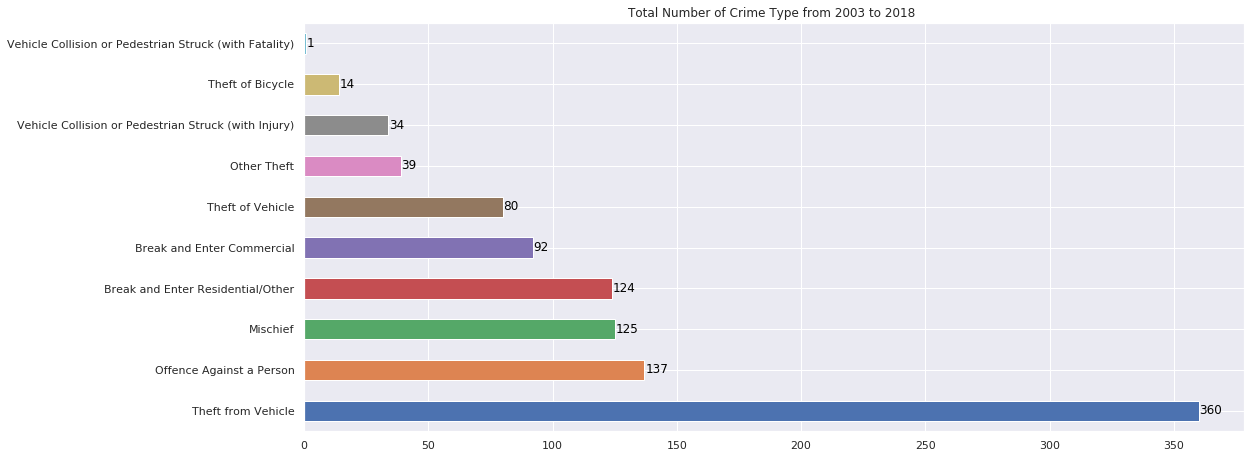

In [159]:
# Plotting top crimes in Christmas with the total number
graph = chris_df['TYPE'].value_counts().plot.barh(figsize=(15,7), title = 'Total Number of Crime Type from 2003 to 2018 ' )

# setting individual bar lables using above list
for i in graph.patches:
    # get_x pulls left or right; get_height pushes up or down
    graph.text(i.get_width()+.3, i.get_y()+.17, str(i.get_width()), fontsize=12, color='black')    

plt.show()

**It seems that theft from a vehicle is the most common crime type in Christmas too.**
**Let plot the data on a map and see where is that**

In [160]:
# Creating a map and changing style
chris_map = folium.Map(location=[49.246292, -123.1162261], zoom_start=12, tiles="CartoDB dark_matter")
marker_cluster = folium.plugins.MarkerCluster().add_to(chris_map)
for name, row in chris_df.iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["TYPE"]).add_to(marker_cluster)
#crime_map.create_map('stops.html')
chris_map

In [161]:
chris_heatmap = folium.Map(location=[49.246292, -123.1162261], zoom_start=13, tiles="CartoDB dark_matter")
chris_heatmap.add_child(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in chris_df.iterrows()]))
#stops_heatmap.save("heatmap.html")
chris_heatmap



**It seems that most crimes happened in downtown with some occurred in the southern part of the city.**